In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Loading the dataset
file_path = 'C:/Users/cui10/workspace/course/508datamining/Assignment_06/Online Retail.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# import dataset
online_retail_data =  pd.read_csv('Online Retail.csv')
 


# Filter out rows with missing values in StockCode or Description
filtered_data = online_retail_data.dropna(subset=['StockCode', 'Description'])

# Group by InvoiceNo and collect all StockCodes for each invoice
grouped = filtered_data.groupby('InvoiceNo')['StockCode'].apply(list)

# Convert grouped data into a list of transactions
transactions = grouped.values.tolist()

# Use TransactionEncoder to transform the data
encoder = TransactionEncoder()
transactions_array = encoder.fit(transactions).transform(transactions)

# Convert the array back into a DataFrame
transactions_df = pd.DataFrame(transactions_array, columns=encoder.columns_)

print(transactions_df)

       10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
0      False  False  False   False   False   False  False  False  False   
1      False  False  False   False   False   False  False  False  False   
2      False  False  False   False   False   False  False  False  False   
3      False  False  False   False   False   False  False  False  False   
4      False  False  False   False   False   False  False  False  False   
...      ...    ...    ...     ...     ...     ...    ...    ...    ...   
24441  False  False  False   False   False   False  False  False  False   
24442  False  False  False   False   False   False  False  False  False   
24443  False  False  False   False   False   False  False  False  False   
24444  False  False  False   False   False   False  False  False  False   
24445  False  False  False   False   False   False  False  False  False   

       11001  ...      M   PADS   POST      S  gift_0001_10  gift_0001_20  \
0      False  ...  Fal

In [11]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)


In [12]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sort the rules by confidence
rules = rules.sort_values(by='confidence', ascending=False)

# Display the top 10 association rules
top_10_rules = rules.head(10)
print(top_10_rules)


                antecedents consequents  antecedent support  \
1530         (23170, 23172)     (23171)            0.011127   
1532         (23171, 23172)     (23170)            0.011536   
1603  (22356, 20723, 22355)     (20724)            0.011167   
1628  (22699, 22423, 22698)     (22697)            0.013785   
821                 (23172)     (23171)            0.012845   
1298         (21080, 21086)     (21094)            0.012108   
1513         (22699, 22698)     (22697)            0.025117   
1428        (21935, 85099B)       (DOT)            0.011536   
1631  (22697, 22423, 22698)     (22699)            0.014154   
1616  (22411, 22386, 21931)    (85099B)            0.012681   

      consequent support   support  confidence       lift  leverage  \
1530            0.015790  0.010554    0.948529  60.071891  0.010378   
1532            0.018694  0.010554    0.914894  48.939802  0.010338   
1603            0.042952  0.010104    0.904762  21.064580  0.009624   
1628            0.0432

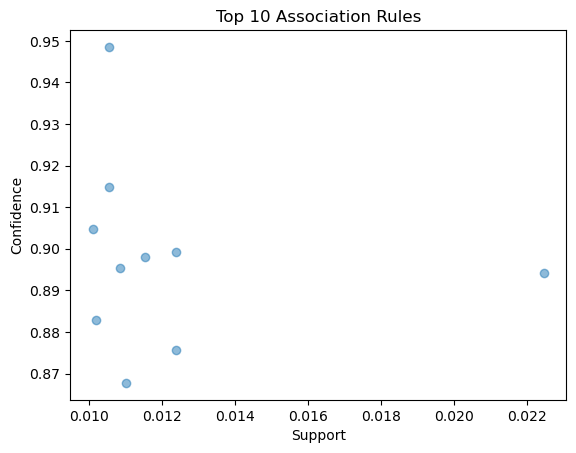

In [13]:
import matplotlib.pyplot as plt

# Plotting confidence vs. support
plt.scatter(top_10_rules['support'], top_10_rules['confidence'], alpha=0.5)
plt.title('Top 10 Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()
